In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
# read comments cvs
df_comments = pd.read_csv("Manual checking - comments.csv")

In [3]:
# df_comments

In [4]:
# read answers cvs
df_answers = pd.read_csv("Manual checking - answers.csv")

In [5]:
# df_answers

In [6]:
def split_true_false(df):
    df_true = df[df['outdated (manually checked)'] == True]
    df_false = df[df['outdated (manually checked)'] == False]
    return df_true,df_false

In [7]:
def tags_count(tgs):
    service = []
    for items in tgs:
        if pd.isna(items)==False:
            line = list(items.split(","))
            service.extend(line)
    return service

In [8]:
def tags_to_dict(df_tags, tag_list):
    tag_dict = {}
    for item in df_tags:
        tag_dict[item] = 0
    for i in tag_list:
        tag_dict[i]+=1
    return tag_dict

In [9]:
def get_df_keys(df_tags):
    key_= Counter(df_tags).keys()
    value_=Counter(df_tags).values()
    dict_df= dict(zip(key_,value_))
    return dict_df

In [10]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
def plot_service(dict_df,dict_true,dict_false): 

    # set width of bar
    barWidth = 0.25

    # set height of bar
    bars1 = dict_df.values()
    bars2 = dict_true.values()
    bars3 = dict_false.values()

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    plt.bar(r1, bars1, color='#b5ffb9', width=barWidth, edgecolor='white', label='Total positive')
    plt.bar(r2, bars2, color='#f9bc86', width=barWidth, edgecolor='white', label='True positive')
    plt.bar(r3, bars3, color='#a3acff', width=barWidth, edgecolor='white', label='False positive')

    # Add xticks on the middle of the group bars
    plt.xlabel('Amazon—Service', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], dict_df.keys(),rotation=270)

    # Create legend & Show graphic
    plt.legend()
    plt.show()


In [11]:
# df_comments_true,df_comments_false = split_true_false(df_comments)
# tags_comments_df =tags_count(df_comments['related service'])
# tags_comments_true =tags_count(df_comments_true['related service'])
# tags_comments_false =tags_count(df_comments_false['related service'])
# dict_df_comments= get_df_keys(tags_comments_df)
# dict_true = tags_to_dict(tags_in_df,tags_in_true)
# dict_false = tags_to_dict(tags_in_df,tags_in_false)
# plot_service(dict_df,dict_true,dict_false)

In [12]:
def ensemble(df):
    df_true,df_false = split_true_false(df)
    tags_df =tags_count(df['related service'])
    tags_true =tags_count(df_true['related service'])
    tags_false =tags_count(df_false['related service'])
    dict_df= get_df_keys(tags_df)
    dict_true = tags_to_dict(tags_df,tags_true)
    dict_false = tags_to_dict(tags_df,tags_false)
    plot_service(dict_df,dict_true,dict_false)

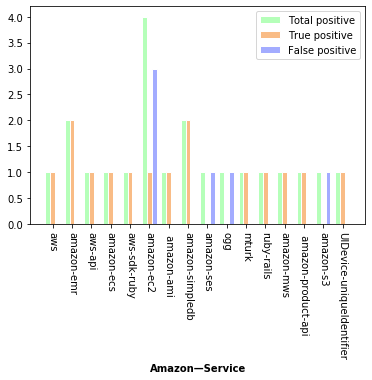

In [13]:
ensemble(df_answers)

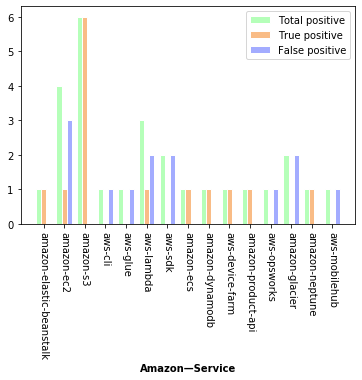

In [14]:
ensemble(df_comments)